# Project 1 - Part 1 & 2

- Zach Dawson

### Imports

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Data

In [156]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRkIwH94EktrYdv19S1dFxJGuqxCb1kaXAwEKrePJOvMIlsq-bsf7OQiS4FKSgxwhb5Kb00BUFV1d14/pub?gid=834996468&single=true&output=csv"
df = pd.read_csv(file_url)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [158]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Cleaning

In [159]:
# Checking for rows/columns
df.shape

(8523, 12)

In [160]:
# Checking for data types of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [161]:
# checking for duplicates
df.duplicated().sum()

0

In [162]:
# Checking for NaN values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [163]:
# Droping Outlet_Size due to lack of correlation with other columns
df.drop(columns='Outlet_Size', inplace=True)
# Checking NaN values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [164]:
# Filling the missing values of Item_Weight with the median value of the column
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)

In [165]:
# Checking for NaN values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [166]:
# Checking for unique values 
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [167]:
# While checking the different object types I found these inconsistenties in the data 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [168]:
# Fixing the inconsistenties in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
# Checking to see if the inconsistenties are fixed
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [169]:
# Finding the min, max, and mean for every numeric column
df.agg({
    "Item_Weight": ['min', 'max', 'mean'],
    "Item_Visibility": ['min', 'max', 'mean'],
    "Item_MRP": ['min', 'max', 'mean'],
    "Outlet_Establishment_Year": ['min', 'max', 'mean'],
    "Item_Outlet_Sales": ['min', 'max', 'mean']
}).round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.81,0.07,140.99,1997.83,2181.29


# Project 1 Part 3

### Exploratory Visuals

### Histogram

- Checking the database to see what columns in the list could be used to visualize certain features in this database.

In [170]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


- After analysing the data set I've concluded that I want to find the differences between item outlet sales by type.

- Now I'm going to pick two outlets with different types to visualize the differences.
    - `OUT049` (Supermarket Type 1)
    - `OUT010` (Grocery Store)

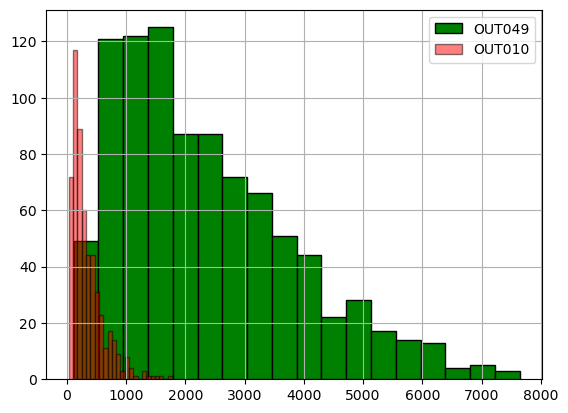

In [171]:
# Seeing the item sales from specified outlets.

# Using style to improve visualization.
plt.style.use('tableau-colorblind10')

# Creating filters so that it only visualize specified outlets.
df.loc[df['Outlet_Identifier'] == 'OUT049', 'Item_Outlet_Sales'].hist(bins='auto', edgecolor='black', facecolor='green', label='OUT049')
df.loc[df['Outlet_Identifier'] == 'OUT010', 'Item_Outlet_Sales'].hist(bins='auto', edgecolor='black', alpha=0.5, facecolor='red', label='OUT010')
# Using .legend() to identify outlets.
plt.legend()

- After taking a look at this graph it is apparent that `OUT049` item sales reaches higher margins than `OUT010` sales. 

### Boxplot

- Now I want to visualize the information regarding the mean, median, and mode of item sales of the specified outlets.

- We can accomplish this using `.boxplot()` to get this visualization.
    - First we will create filters assigning them to variables `outlet_49` and `outlet_10`.

In [172]:
# Creating filter to isolate OUT049 and OUT018 item sales. 
outlet_49 = df.loc[df['Outlet_Identifier']=='OUT049', 'Item_Outlet_Sales']
outlet_10 = df.loc[df['Outlet_Identifier']=='OUT010', 'Item_Outlet_Sales']

- Next will create the `.boxplot()` and customizing it to make the visuals more appealing and easy to comprehend.

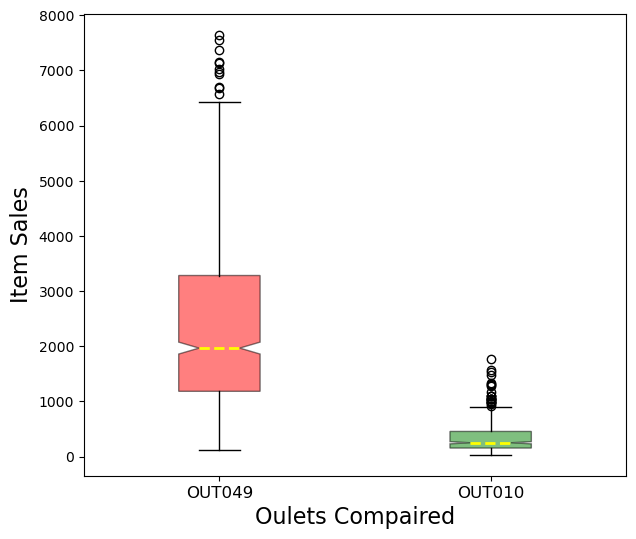

In [173]:
# Creating a boxplot to see to differences between two of the outlets of item_sales.

# Using same style as histogram.
with plt.style.context('tableau-colorblind10'):

# Using a combination of MATLAB-Style and Object Syntax to configure boxplot.
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
    boxplots = axes.boxplot([outlet_49, outlet_10],
             notch=True,
             labels=['OUT049', 'OUT010'],
             widths=.3,
             patch_artist=True,
             medianprops=dict(linestyle='--', linewidth=2, color='Yellow'),
             boxprops=dict(linestyle='-', linewidth=1, color='Black', facecolor='Green', alpha=0.5))
    boxplot1 = boxplots['boxes'][0]
    boxplot1.set_facecolor('red')
    plt.xlabel('Oulets Compaired', fontsize=16)
    plt.ylabel('Item Sales', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
plt.show()

- Looking at the visual above it is clear to see that `OUT049` has higher ranges and also salse but `OUT010` have more outliers as a result of the data given.

### Heat map

- Now I want to see the correlation coefficiency between the features in this dataset.
    - I will accomplish this by assigning `df.corr()` to the variable `corr` to get the correlations in the dataset.
    - Next I will use seaborns `.heatmap()` to graph the correlations found in `corr`.

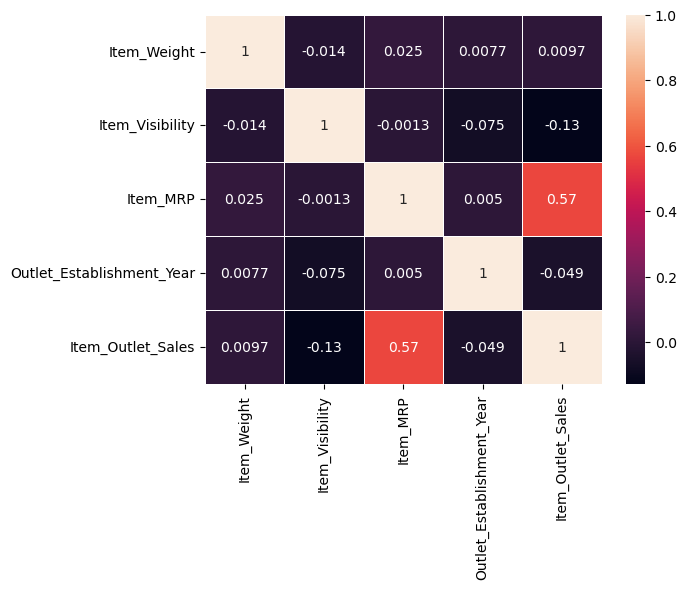

In [174]:
# Creating a heatmap.
corr = df.corr()

# I choose to keep the default style of seaborns heat map because I find that the style is already visually appealing.
# I did change the linecolor and linewidths to make the data in the heat map stand out.
ax = sns.heatmap(corr, annot=True, linecolor='White', linewidths=.7)

- After reviewing this heat map, the only two positive correltations present are, the columns positive correlation with themselves, and the positive correlation between `Item_MRP` and `Item_Outlet_Sales` (which is considered a `"moderate"` correlation being between 0.5 and 0.7). 

# Project 1 Part 4

### Exploratory Visuals

- To dive deeper into analizing this data we need to ask questions that stockholders may have about our analysis.

### Questions
1. What outlet has the most item sales?
2. What type of outlet has the most item sales?

In [175]:
# First we will check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


1. What outlet has the most item sales and what is the most common range for item sales?


In [176]:
# grouping outlets by item sales to see the highest earner
means = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

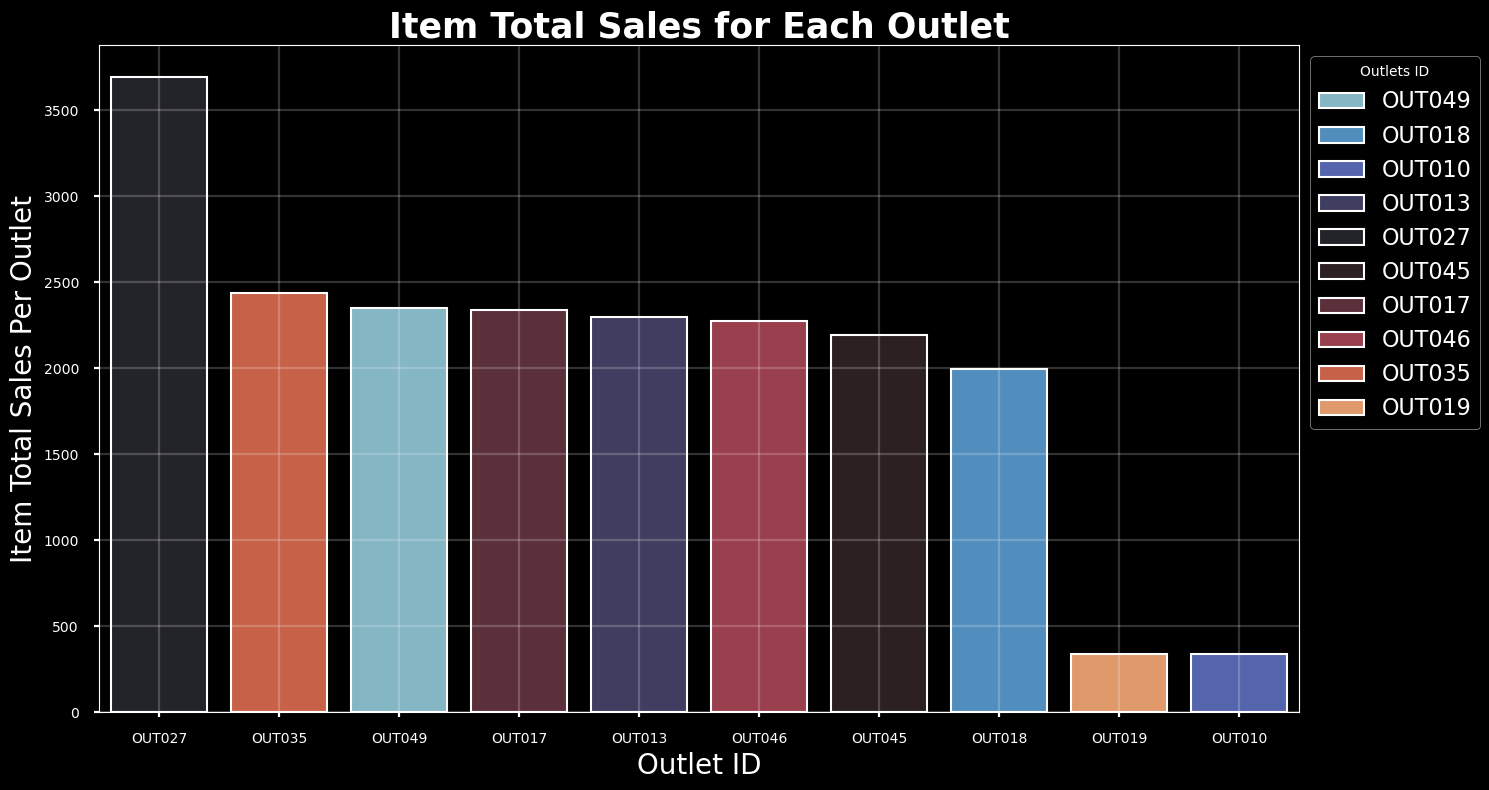

In [177]:
# setting style for barplot
with plt.style.context(['seaborn-muted', 'seaborn-poster', 'dark_background']):
  # setting fig size
  plt.figure(figsize=(15,8))
  # Creating barplot
  sns.barplot(data=df, x='Outlet_Identifier', 
              y='Item_Outlet_Sales', hue='Outlet_Identifier', 
              order=means.index, 
              dodge=False, 
              edgecolor='white', 
              linewidth=1.5, 
              ci=False, 
              palette='icefire')
  # Setting x & y ticks
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  # Setting x & y labels
  plt.ylabel('Item Total Sales Per Outlet', fontsize=20)
  plt.xlabel('Outlet ID', fontsize=20)
  # Seting legend, grid, title, and tight_layout
  plt.legend(bbox_to_anchor=(1,1), title='Outlets ID')
  plt.title('Item Total Sales for Each Outlet', fontweight='bold', fontsize=25)
  plt.grid(color='w', alpha=0.2)
  plt.tight_layout()
plt.show()

- Looking at the barplot, the highest earning outlet is `OUT027`. Note, that most outlets are in between range 2,000 and 2,500. This means that most outlets have around the same item sales.

2. What type of outlet has the most item sales?

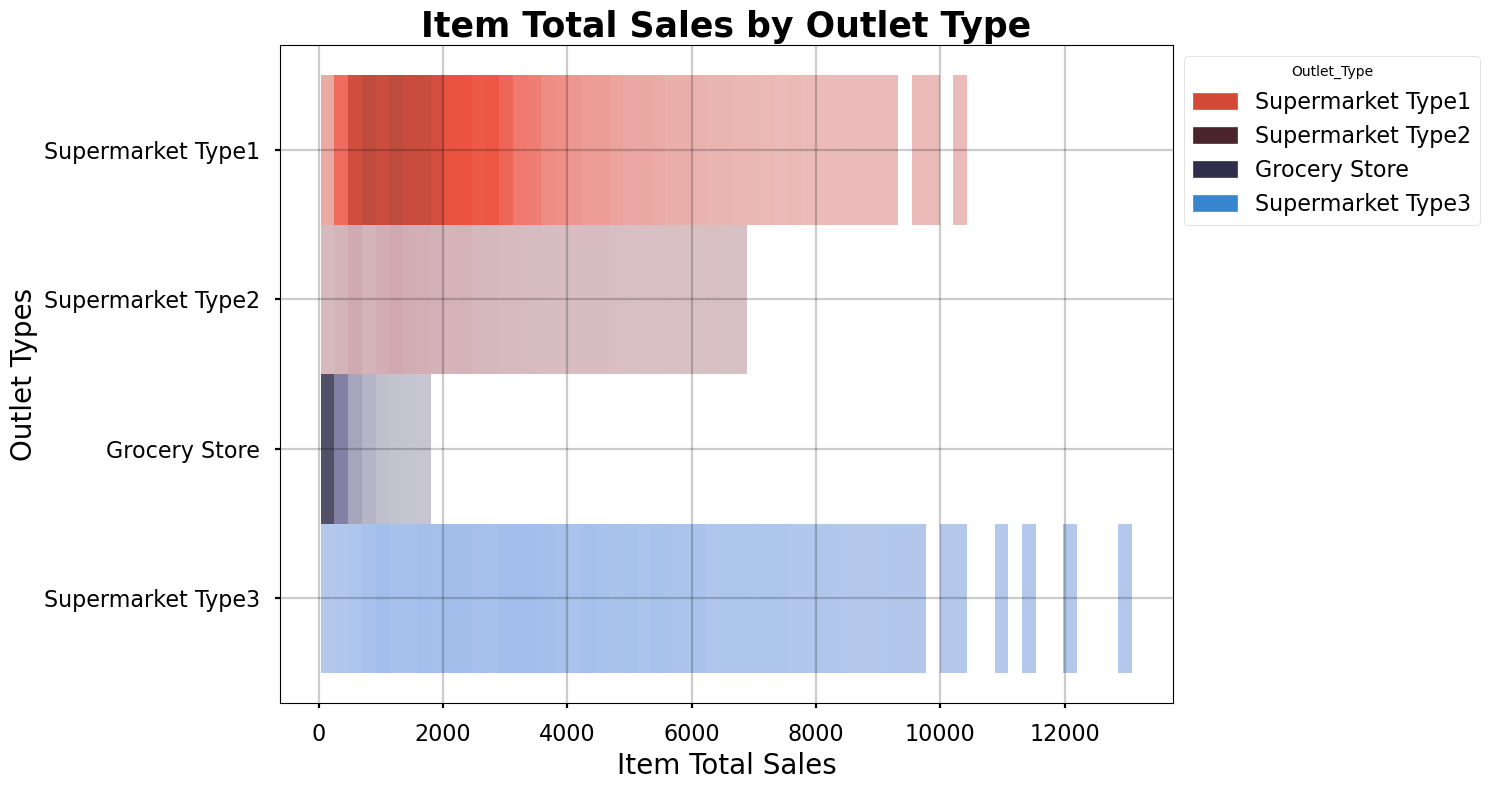

In [201]:
# Setting style for histplot
with plt.style.context(['seaborn-muted', 'seaborn-poster']):
  # Setting fig size
  plt.figure(figsize=(15, 8))
  # Creating histplot OOP style
  ax = sns.histplot(data=df, 
              x='Item_Outlet_Sales',
              y='Outlet_Type', 
              hue = 'Outlet_Type', 
              palette='icefire_r', 
              bins='auto',
              element='bars',
              multiple='dodge')

  sns.move_legend(ax, 'upper left',bbox_to_anchor=(1,1))
  # Setting x & y labels
  ax.set_xlabel('Item Total Sales', fontsize=20)
  ax.set_ylabel('Outlet Types', fontsize=20)
  # Setting title
  ax.set_title('Item Total Sales by Outlet Type', fontsize=25, fontweight='bold')
  # Setting grid & tight_layout
  plt.grid(color='black', alpha=0.2)
  plt.tight_layout()
plt.show()

## Project 1-Part 5

### Setting up dataframe before Machine Learning

- Importing all modules.

In [179]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

- First, I will reload the dataset and clean data to ensure there are no data leakage.

In [180]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRkIwH94EktrYdv19S1dFxJGuqxCb1kaXAwEKrePJOvMIlsq-bsf7OQiS4FKSgxwhb5Kb00BUFV1d14/pub?gid=834996468&single=true&output=csv"
df_sci = pd.read_csv(file_url)
df_sci.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [181]:
# Checking for duplicates
df_sci.duplicated().sum()

0

In [182]:
# Using for loop to check values of columns for inconsistencies in categorical data.
for i in df_sci.columns:
    print(f'Column: {i}\n{df_sci[i].value_counts()}\n')

Column: Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Column: Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Column: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Column: Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Column: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                

In [183]:
# Fixing inconsistencies in column 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Splitting data to prepare for Machine Learning.

In [184]:
# Setting target (Item_Outlet_Sales) and features
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Type']]
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [185]:
# Making selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [186]:
# Making imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Making Scaler
scaler = StandardScaler()
# Making One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [187]:
# Making pipelines
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

In [188]:
# Making tuples for ColumnTransformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# Transforming
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029EFBFC3C10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029EFBFC3700>)])

In [189]:
# Fitting preprocessor to X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029EFBFC3C10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029EFBFC3700>)])

In [190]:
# Transform train and test
train_process = preprocessor.transform(X_train)
test_process = preprocessor.transform(X_test)

In [191]:
# Checking to see if imputation of missing values worked.
print(np.isnan(train_process).sum().sum(), 'missing values in train.')
print('\n')
print(np.isnan(test_process).sum().sum(), 'missing values in test.')
print('\n')
train_process

0 missing values in train.


0 missing values in test.




array([[ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5686337 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11896108,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12582258, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77785212, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82944552, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

### Project 1 - Final

#### Importing Modules

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

- Creating function that evaulates the model.

In [193]:
def evaluate_func(data, X_train, y_train, X_test, y_test, train_pred, test_pred):
    # MAE
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    # MSE
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    #RMSE
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    # R2
    train_r2 = data.score(X_train, y_train)
    test_r2 = data.score(X_test, y_test)

    print(f'Train MAE: {train_mae}\nTest MAE: {test_mae}\n')
    print(f'Train MSE: {train_mae}\nTest MSE: {test_mse}\n')
    print(f'Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}\n')
    print(f'Train R2: {train_r2}\nTest R2: {test_r2}')

#### Task 1
1. Your first task is to build a linear regression model to predict sales.

In [194]:
# Creating LinearRegression
lin_reg = LinearRegression()
# Making pipeline using scaler and lin_reg
reg_pipe = make_pipeline(preprocessor, lin_reg)
# fitting pipeline to training set
reg_pipe.fit(X_train,y_train)
# Creating predictions off of pipeline
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
# using custom function to see outputs of model using regression metrics
evaluate_func(data=reg_pipe, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, train_pred=train_pred, test_pred=test_pred)

Train MAE: 848.4782727267757
Test MAE: 803.9041870315474

Train MSE: 848.4782727267757
Test MSE: 1190756.9881949665

Train RMSE: 1141.365765559883
Test RMSE: 1091.2181212731791

Train R2: 0.5598123638750319
Test R2: 0.568406382518067


### Task 2
- Your second task is to build a regression tree model to predict sales.

#### Import Modules

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
# Creating Decision tree pipeline with preprocessing
dec_tree_pipe = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029EFBFC3C10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029EFBFC3700>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [197]:
# Crating list of depth values
depths = list(range(2,40))
# Creating dataframe to store the scores from loop
scores = pd.DataFrame(index=depths, columns=['Test Score', 'Train Score'])
# Creating for loop to loop through different depth to see the highest output
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_pred = dec_tree_pipe.predict(X_train)
    test_pred = dec_tree_pipe.predict(X_test)
    scores.loc[depth, 'Train Score'] = r2_score(y_train, train_pred)
    scores.loc[depth, 'Test Score'] = r2_score(y_test, test_pred)
# Sorting by test scores to see the highest value by depth
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594702,0.603933
4,0.584005,0.582625
6,0.583894,0.614827
7,0.580717,0.626643
8,0.56138,0.644482


Text(0, 0.5, 'R2')

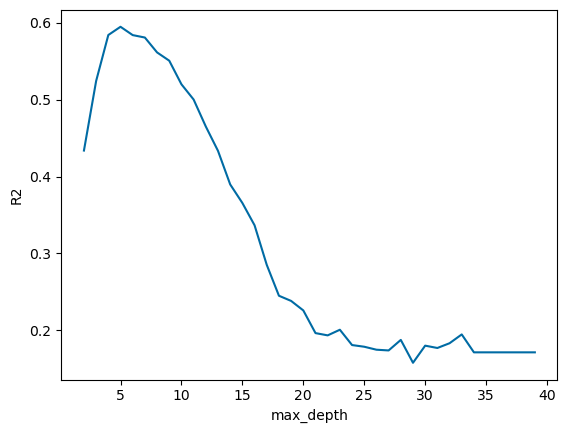

In [198]:
sns.lineplot(data=scores, x=depths, y='Test Score')
plt.xlabel('max_depth')
plt.ylabel('R2')

In [199]:
# Creating decision tree
dec_tree_4 = DecisionTreeRegressor(max_depth=5, random_state=42)

dec_4_pipe = make_pipeline(preprocessor, dec_tree_4)
# Fitting data to training sets
dec_4_pipe.fit(X_train, y_train)
# Creating predictions for training and testing sets
train_pred = dec_4_pipe.predict(X_train)
test_pred = dec_4_pipe.predict(X_test)
# Using custom function to see Regression Metric values
evaluate_func(data=dec_4_pipe, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, train_pred=train_pred, test_pred=test_pred)

Train MAE: 762.6548715934737
Test MAE: 738.4803177114884

Train MSE: 762.6548715934737
Test MSE: 1118206.8715903033

Train RMSE: 1082.6553744791681
Test RMSE: 1057.4530115283153

Train R2: 0.6039330279227335
Test R2: 0.5947024005843626


# Task 3
3. You now have tried 2 different models on your data set. You need to determine which model to implement.
    - Overall, which model do you recommend?
    - Justify your recommendation.

I would recommend the regression tree model. I came to this conclusion mainly from the `R2` and `RMSE` values and also the customization of the regression tree. Even though the `RMSE` is lower on the training and testing set for the regression tree. The `R2` for the regression is higher for both sets. Also, being able to customize the depth to have the highest output for the regression metric, it makes for a more accurate model prediction.